In [1]:
from vadetisweb.anomaly_algorithms.detection.cluster import cluster_gaussian_mixture
from vadetisweb.anomaly_algorithms.detection.histogram import histogram
from vadetisweb.anomaly_algorithms.detection.svm import svm
from vadetisweb.anomaly_algorithms.detection.isolation_forest import isolation_forest
from vadetisweb.anomaly_algorithms.detection.lisa import lisa_pearson, lisa_dtw, lisa_geo
from vadetisweb.anomaly_algorithms.detection.robust_pca import robust_pca_huber_loss
from vadetisweb.models import DataSet, TimeSeries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#input
def get_dataset(title):
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()
    return dataset, training_dataset

def get_ts_ids(dataset, ts_names):
    ts_ids = []
    time_series = dataset.timeseries_set.all()
    for ts in time_series:
        if ts.name in ts_names:
            ts_ids.append(ts.id)
            
    return ts_ids

def get_lisa_detection_ts_id(dataset, ts_name):
    time_series = dataset.timeseries_set.all()
    for ts in time_series:
        if ts.name == ts_name:
            return ts.id
    return None

In [5]:
def lisa_pearson_l(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10):
    return lisa_pearson(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size)

In [6]:
def lisa_dtw_l(df, df_class, time_series_id, maximize_score='F1-Score', window_size=10, distance_function='euclidean'):
    return lisa_dtw(df, df_class, time_series_id, maximize_score=maximize_score, window_size=window_size, distance_function=distance_function)

In [7]:
def lisa_geo_l(df, df_class, time_series_id, maximize_score='F1-Score'):
    return lisa_geo(df, df_class, time_series_id, maximize_score=maximize_score)

In [8]:
def rpca_detection_l(df, df_class, df_train, df_train_class, delta=1, n_components=2, maximize_score='F1-Score', train_size=0.5):
    return robust_pca_huber_loss(df, df_class, df_train, df_train_class, delta=delta, n_components=n_components, maximize_score=maximize_score, train_size=train_size)

In [9]:
def histogram_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', train_size=0.5):
    return histogram(df, df_class, df_train, df_train_class, maximize_score=maximize_score, train_size=train_size)

In [10]:
def cluster_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_components=3, n_init=3, train_size=0.5):
    return cluster_gaussian_mixture(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_components=n_components, n_init=n_init, train_size=train_size)

In [11]:
def svm_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', nu=0.95, kernel='rbf', train_size=0.5):
    return svm(df, df_class, df_train, df_train_class, maximize_score=maximize_score, nu=nu, kernel=kernel, train_size=train_size)

In [12]:
def isolation_forest_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_jobs=-1, bootstrap=False, n_estimators=40, train_size=0.5):
    return isolation_forest(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_jobs=n_jobs, bootstrap=bootstrap, n_estimators=n_estimators, train_size=train_size)

In [2]:
# Temp1 Single - TS NUMBER
dataset_name = 'Idaweb Swiss Temperature TS14'
ts_names = ['REH', 'KLO', 'SHA', 'NABZUE', 'SMA', 'WYN', 'WAE', 'SAG', 'SRS', 'THU', 'VAD', 'RUE', 'HAI', 'VLS']
ts_name_lisa = 'REH'
dimensions = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [14]:
# TS NUMBER - LISA PEARSON
dataset, training_dataset = get_dataset(dataset_name)
# Results array [nmi, rmse, f1]
pearson_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, info, df_response, df_class_response = lisa_pearson_l(df, df_class, ts_id)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    pearson_results.append(result)
    
lisa_pearson_results = np.array(pearson_results)

In [15]:
# TS NUMBER - LISA DTW
dataset, training_dataset = get_dataset(dataset_name)
# Results array [nmi, rmse, f1]
dtw_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, info, df_response, df_class_response = lisa_dtw_l(df, df_class, ts_id)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    dtw_results.append(result)
    
lisa_dtw_results = np.array(dtw_results)

In [17]:
# TS NUMBER - LISA GEO
dataset, training_dataset = get_dataset(dataset_name)
# Results array [nmi, rmse, f1]
geo_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_id = get_lisa_detection_ts_id(dataset, ts_name_lisa)
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, info = lisa_geo_l(df, df_class, ts_id)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    geo_results.append(result)
    
lisa_spatial_results = np.array(geo_results)

In [18]:
# TS NUMBER - RPCA
dataset, training_dataset = get_dataset(dataset_name)
# Results array [nmi, rmse, f1]
r_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = rpca_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    r_results.append(result)
    
rpca_results = np.array(r_results)  

In [19]:
# TS NUMBER - HISTOGRAM
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
h_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = histogram_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    h_results.append(result)
    
histogram_results = np.array(h_results)

In [20]:
# TS NUMBER - CLUSTER
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
c_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = cluster_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    c_results.append(result)
    
cluster_results = np.array(c_results)  

In [21]:
# TS NUMBER - SVM
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
s_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = svm_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    s_results.append(result)
    
svm_results = np.array(s_results)  

In [22]:
# TS NUMBER - ISOLATION FOREST
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
i_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = isolation_forest_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    i_results.append(result)

isolation_results = np.array(i_results)

In [23]:
scores = [{ 'title' : 'LISA (Pearson)', 'scores' : lisa_pearson_results }, 
          { 'title' : 'LISA (DTW)', 'scores' : lisa_dtw_results }, 
          { 'title' : 'LISA (Vanilla)', 'scores' :  lisa_spatial_results }, 
          { 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [24]:
print(scores)

[{'title': 'LISA (Pearson)', 'scores': array([[0.015, 0.556, 0.13 ],
       [0.074, 0.216, 0.252],
       [0.411, 0.033, 0.66 ],
       [0.582, 0.02 , 0.787],
       [0.656, 0.016, 0.84 ],
       [0.702, 0.013, 0.86 ],
       [0.726, 0.013, 0.851],
       [0.688, 0.014, 0.844],
       [0.596, 0.019, 0.787],
       [0.712, 0.013, 0.854],
       [0.659, 0.016, 0.814],
       [0.591, 0.02 , 0.756],
       [0.565, 0.022, 0.78 ]])}, {'title': 'LISA (DTW)', 'scores': array([[0.014, 0.894, 0.101],
       [0.046, 0.262, 0.207],
       [0.341, 0.045, 0.602],
       [0.607, 0.019, 0.808],
       [0.702, 0.013, 0.863],
       [0.742, 0.011, 0.882],
       [0.721, 0.012, 0.872],
       [0.708, 0.013, 0.871],
       [0.67 , 0.015, 0.831],
       [0.721, 0.012, 0.872],
       [0.712, 0.013, 0.854],
       [0.56 , 0.022, 0.776],
       [0.57 , 0.022, 0.784]])}, {'title': 'LISA (Vanilla)', 'scores': array([[0.014, 0.897, 0.1  ],
       [0.179, 0.157, 0.364],
       [0.608, 0.023, 0.8  ],
       [0.84 

In [3]:
import numpy as np
scores =[{'title': 'LISA (Pearson)', 'scores': np.array([[0.015, 0.556, 0.13 ],
       [0.074, 0.216, 0.252],
       [0.411, 0.033, 0.66 ],
       [0.582, 0.02 , 0.787],
       [0.656, 0.016, 0.84 ],
       [0.702, 0.013, 0.86 ],
       [0.726, 0.013, 0.851],
       [0.688, 0.014, 0.844],
       [0.596, 0.019, 0.787],
       [0.712, 0.013, 0.854],
       [0.659, 0.016, 0.814],
       [0.591, 0.02 , 0.756],
       [0.565, 0.022, 0.78 ]])}, {'title': 'LISA (DTW)', 'scores': np.array([[0.014, 0.894, 0.101],
       [0.046, 0.262, 0.207],
       [0.341, 0.045, 0.602],
       [0.607, 0.019, 0.808],
       [0.702, 0.013, 0.863],
       [0.742, 0.011, 0.882],
       [0.721, 0.012, 0.872],
       [0.708, 0.013, 0.871],
       [0.67 , 0.015, 0.831],
       [0.721, 0.012, 0.872],
       [0.712, 0.013, 0.854],
       [0.56 , 0.022, 0.776],
       [0.57 , 0.022, 0.784]])}, {'title': 'LISA (Vanilla)', 'scores': np.array([[0.014, 0.897, 0.1  ],
       [0.179, 0.157, 0.364],
       [0.608, 0.023, 0.8  ],
       [0.84 , 0.006, 0.939],
       [0.876, 0.005, 0.947],
       [0.876, 0.005, 0.947],
       [0.911, 0.003, 0.97 ],
       [0.919, 0.003, 0.969],
       [0.919, 0.003, 0.969],
       [0.897, 0.004, 0.958],
       [0.897, 0.004, 0.958],
       [0.897, 0.004, 0.958],
       [0.771, 0.01 , 0.904]])}, {'title': 'RPCA', 'scores': np.array([[0.008, 0.075, 0.   ],
       [0.844, 0.006, 0.938],
       [0.737, 0.013, 0.881],
       [0.764, 0.011, 0.897],
       [0.725, 0.014, 0.873],
       [0.75 , 0.012, 0.889],
       [0.756, 0.011, 0.895],
       [0.786, 0.009, 0.913],
       [0.679, 0.017, 0.847],
       [0.43 , 0.053, 0.639],
       [0.449, 0.049, 0.657],
       [0.819, 0.007, 0.929],
       [0.444, 0.05 , 0.653]])}, {'title': 'Histogram', 'scores': np.array([[0.005, 0.161, 0.12 ],
       [0.007, 0.173, 0.131],
       [0.01 , 0.632, 0.117],
       [0.006, 0.841, 0.102],
       [0.001, 0.593, 0.1  ],
       [0.003, 0.714, 0.105],
       [0.007, 0.801, 0.105],
       [0.001, 0.677, 0.101],
       [0.   , 0.564, 0.096],
       [0.   , 0.558, 0.094],
       [0.   , 0.425, 0.086],
       [0.   , 0.376, 0.078],
       [0.   , 0.389, 0.093]])}, {'title': 'Cluster', 'scores': np.array([[0.897, 0.004, 0.958],
       [0.887, 0.004, 0.959],
       [0.862, 0.005, 0.949],
       [0.862, 0.005, 0.949],
       [0.887, 0.004, 0.959],
       [0.771, 0.01 , 0.904],
       [0.679, 0.017, 0.847],
       [0.741, 0.012, 0.887],
       [0.841, 0.006, 0.94 ],
       [0.821, 0.007, 0.931],
       [0.725, 0.014, 0.873],
       [0.496, 0.04 , 0.701],
       [0.22 , 0.148, 0.393]])}, {'title': 'SVM', 'scores': np.array([[0.098, 0.067, 0.309],
       [0.091, 0.067, 0.295],
       [0.146, 0.093, 0.384],
       [0.095, 0.137, 0.305],
       [0.087, 0.14 , 0.293],
       [0.112, 0.097, 0.34 ],
       [0.11 , 0.098, 0.338],
       [0.1  , 0.166, 0.297],
       [0.115, 0.17 , 0.309],
       [0.095, 0.197, 0.278],
       [0.038, 0.098, 0.21 ],
       [0.041, 0.094, 0.217],
       [0.039, 0.097, 0.211]])}, {'title': 'Isolation Forest', 'scores': np.array([[0.022, 0.078, 0.152],
       [0.074, 0.087, 0.281],
       [0.17 , 0.088, 0.413],
       [0.078, 0.151, 0.278],
       [0.052, 0.161, 0.237],
       [0.044, 0.109, 0.227],
       [0.   , 0.155, 0.061],
       [0.051, 0.154, 0.238],
       [0.   , 0.162, 0.08 ],
       [0.018, 0.128, 0.   ],
       [0.015, 0.172, 0.157],
       [0.   , 0.225, 0.082],
       [0.005, 0.203, 0.038]])}]

In [4]:
def generate_nmi_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,0], label=title)
    ax.set_ylabel('Score (NMI)')
    ax.set_xlabel('Number of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

In [5]:
def generate_rmse_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,1], label=title)
    ax.set_ylabel('Score (RMSE)')
    ax.set_xlabel('Number of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

In [6]:
def generate_f1_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,2], label=title)
    ax.set_ylabel('Score (F1)')
    ax.set_xlabel('Number of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    
    fig.tight_layout()
    plt.show()

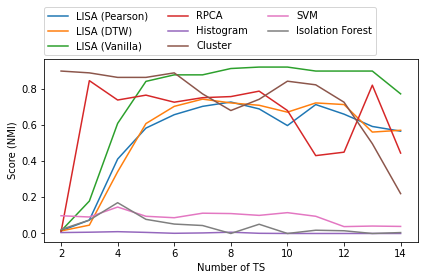

In [7]:
generate_nmi_line_chart(dimensions, scores)

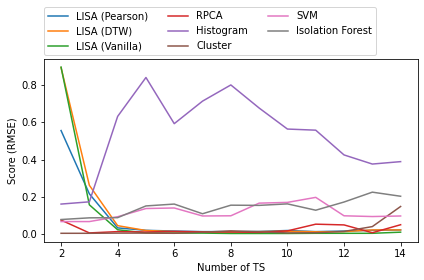

In [8]:
generate_rmse_line_chart(dimensions, scores)

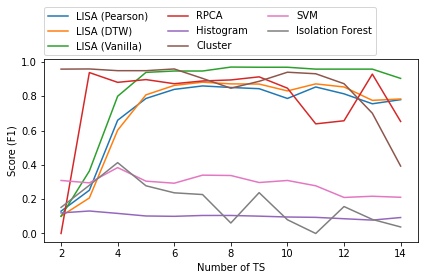

In [9]:
generate_f1_line_chart(dimensions, scores)

In [ ]:
# OLD RESULTS

In [ ]:
# Results
dimension = np.array([2, 4, 6, 8, 10, 12, 14])

# Results array [nmi, rmse, f1]

## LISA
lisa_pearson_results = np.array([[0.015, 0.556, 0.13], [0.411, 0.033, 0.66], [0.656, 0.016, 0.84], [0.726, 0.013, 0.851], [0.596, 0.019, 0.787], [0.659, 0.016, 0.814], [0.564, 0.022, 0.78]])
lisa_dtw_results = np.array([[0.014, 0.894, 0.101], [0.341, 0.045, 0.602], [0.702, 0.013, 0.863], [0.721, 0.012, 0.872], [0.67, 0.015, 0.831], [0.712, 0.013, 0.854], [0.57, 0.022, 0.784]])
lisa_spatial_results = np.array([[0.014, 0.897, 0.1], [0.608, 0.023, 0.8], [0.876, 0.005, 0.947], [0.911, 0.003, 0.97], [0.919, 0.003, 0.969], [0.897, 0.004, 0.958], [0.771, 0.01, 0.904]])

rpca_results = np.array([[0.008, 0.075, 0], [0.737, 0.013, 0.881], [0.725, 0.014, 0.873], [0.756, 0.011, 0.895], [0.679, 0.017, 0.847], [0.449, 0.049, 0.657], [0.444, 0.05, 0.653]])

histogram_results = np.array([[0.005, 0.161, 0.12], [0.01, 0.632, 0.117], [0.001, 0.593, 0.1], [0.007, 0.801, 0.105], [0, 0.564, 0.096], [0, 0.425, 0.086], [0, 0.389, 0.093]])

cluster_results = np.array([[0.897, 0.004, 0.958], [0.862, 0.005, 0.949], [0.887, 0.004, 0.959], [0.679, 0.017, 0.847], [0.841, 0.006, 0.94], [0.725, 0.014, 0.873], [0.22, 0.148, 0.393]])

svm_results = np.array([[0.098, 0.067, 0.309], [0.146, 0.093, 0.384], [0.087, 0.14, 0.293], [0.11, 0.098, 0.338], [0.115, 0.17, 0.309], [0.038, 0.098, 0.21], [0.039, 0.097, 0.211]])

isolation_results = np.array([[0.022, 0.078, 0.152], [0.17, 0.088, 0.413], [0.052, 0.161, 0.237], [0, 0.155, 0.061], [0, 0.162, 0.08], [0.015, 0.172, 0.157], [0.005, 0.203, 0.038]])

results_tpl = np.array([[], [], [], [], [], [], []])

In [ ]:
scores = np.array([lisa_pearson_results, lisa_dtw_results, lisa_spatial_results, rpca_results, histogram_results, cluster_results, svm_results, isolation_results])
scores = [{ 'title' : 'LISA (Pearson)', 'scores' : lisa_pearson_results }, 
          { 'title' : 'LISA (DTW)', 'scores' : lisa_dtw_results }, 
          { 'title' : 'LISA (Vanilla)', 'scores' :  lisa_spatial_results }, 
          { 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

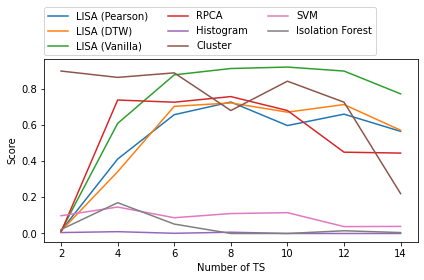

In [53]:
generate_nmi_line_chart(dimension, scores)

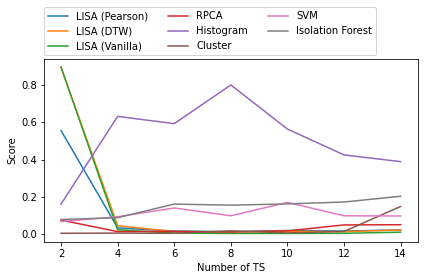

In [54]:
generate_rmse_line_chart(dimension, scores)

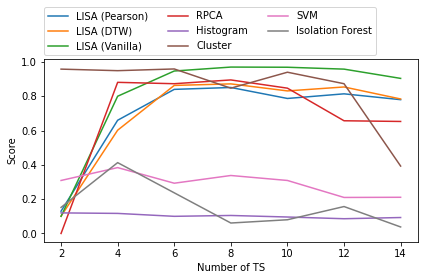

In [55]:
generate_f1_line_chart(dimension, scores)

In [3]:
def autolabel(ax, rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [19]:
def generate_plot(dimension, scores):
    #plt.style.use('ggplot')
    #plt.style.use('seaborn-white')
    x = np.arange(len(dimension))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    ax.grid(axis='y', color='lightgrey', zorder=0)
    rects1 = ax.bar(x - width/2, scores[:, 0], width/2, label='NMI', zorder=2)
    rects2 = ax.bar(x, scores[:, 2], width/2, label='F1-Score', zorder=2)
    rects3 = ax.bar(x + width/2, scores[:, 1], width/2, label='RMSE', zorder=2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Score')
    ax.set_xlabel('Number of TS')
    #ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(dimension)
    #ax.legend()
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)

    #autolabel(ax, rects1)
    #autolabel(ax, rects2)
    #autolabel(ax, rects3)

    fig.tight_layout()

    plt.show()

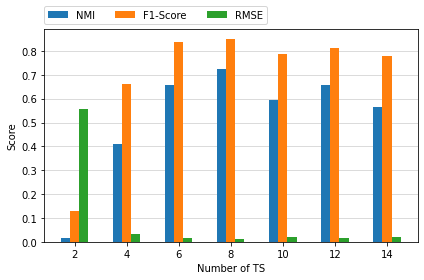

In [17]:
generate_plot(dimension, lisa_pearson_results)

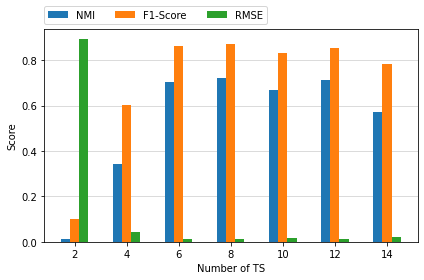

In [20]:
generate_plot(dimension, lisa_dtw_results)

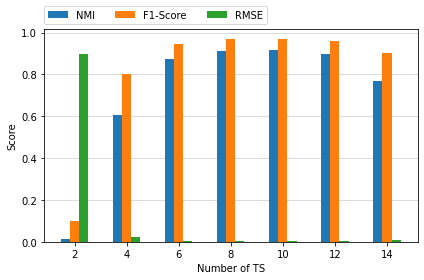

In [22]:
generate_plot(dimension, lisa_spatial_results)

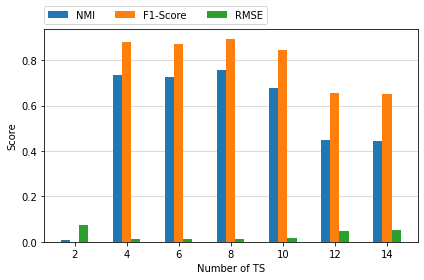

In [25]:
generate_plot(dimension, rpca_results)

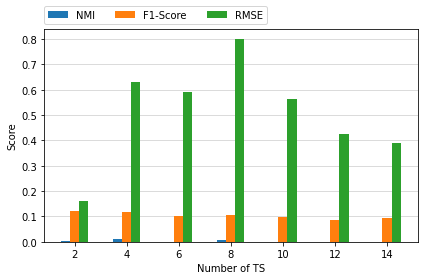

In [27]:
generate_plot(dimension, histogram_results)